In [1]:
import pandas as pd
df = pd.read_csv('Dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Έλεγχος συνέπειας των δεδομένων

In [2]:
# Λαμ΄βάνει τις μοναδικές τιμές από κάθε σ΄τήλη
unique_values_per_column = {col: df[col].unique() for col in df.columns}

for col, unique_values in unique_values_per_column.items():
    print(f"{col}: {unique_values}")

Company: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' nan 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
TypeName: ['Ultrabook' 'Notebook' nan 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
Inches: ['13.3' '15.6' '15.4' '14' '12' nan '17.3' '13.5' '12.5' '13' '18.4'
 '13.9' '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17'
 '15' '14.1' '11.3' '10.1']
ScreenResolution: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080' nan
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'Touchscreen 2256x1504' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel 1366x768' 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 '1600x900' 'IPS Panel 4K Ultra HD

## Επεξεργασία της στήλης `ScreenResolution`

In [3]:
dt = df['ScreenResolution'].sort_values().drop_duplicates().tolist()
print(len(dt))
dt

41


['1366x768',
 '1440x900',
 '1600x900',
 '1920x1080',
 '2560x1440',
 '4K Ultra HD / Touchscreen 3840x2160',
 '4K Ultra HD 3840x2160',
 'Full HD / Touchscreen 1920x1080',
 'Full HD 1920x1080',
 'IPS Panel 1366x768',
 'IPS Panel 2560x1440',
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
 'IPS Panel 4K Ultra HD 3840x2160',
 'IPS Panel Full HD / Touchscreen 1920x1080',
 'IPS Panel Full HD 1366x768',
 'IPS Panel Full HD 1920x1080',
 'IPS Panel Full HD 1920x1200',
 'IPS Panel Full HD 2160x1440',
 'IPS Panel Full HD 2560x1440',
 'IPS Panel Quad HD+ / Touchscreen 3200x1800',
 'IPS Panel Quad HD+ 2560x1440',
 'IPS Panel Quad HD+ 3200x1800',
 'IPS Panel Retina Display 2304x1440',
 'IPS Panel Retina Display 2560x1600',
 'IPS Panel Retina Display 2736x1824',
 'IPS Panel Retina Display 2880x1800',
 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
 'IPS Panel Touchscreen 1366x768',
 'IPS Panel Touchscreen 1920x1200',
 'IPS Panel Touchscreen 2400x1600',
 'IPS Panel Touchscreen 2560x1440',
 'Quad HD

Παρακάτω γίνεται η διόρθωση των κωδικών για κάποιες κατηγορίες

In [4]:
df['ScreenResolution'].replace('Touchscreen / 4K Ultra HD 3840x2160','4K Ultra HD / Touchscreen 3840x2160', inplace = True)
df['ScreenResolution'].replace('Touchscreen / Full HD 1920x1080','Full HD / Touchscreen 1920x1080', inplace = True)
df['ScreenResolution'].replace('Touchscreen / Quad HD+ 3200x1800','Quad HD+ / Touchscreen 3200x1800', inplace = True)
df['ScreenResolution'].replace('IPS Panel Touchscreen / 4K Ultra HD 3840x2160','IPS Panel 4K Ultra HD / Touchscreen 3840x2160', inplace = True)

# έλεγχος ότι πραγματοποιήθηκε η διόρθωση των τιμών
dt = df['ScreenResolution'].sort_values().drop_duplicates().tolist()
print(len(dt))
dt

37


['1366x768',
 '1440x900',
 '1600x900',
 '1920x1080',
 '2560x1440',
 '4K Ultra HD / Touchscreen 3840x2160',
 '4K Ultra HD 3840x2160',
 'Full HD / Touchscreen 1920x1080',
 'Full HD 1920x1080',
 'IPS Panel 1366x768',
 'IPS Panel 2560x1440',
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
 'IPS Panel 4K Ultra HD 3840x2160',
 'IPS Panel Full HD / Touchscreen 1920x1080',
 'IPS Panel Full HD 1366x768',
 'IPS Panel Full HD 1920x1080',
 'IPS Panel Full HD 1920x1200',
 'IPS Panel Full HD 2160x1440',
 'IPS Panel Full HD 2560x1440',
 'IPS Panel Quad HD+ / Touchscreen 3200x1800',
 'IPS Panel Quad HD+ 2560x1440',
 'IPS Panel Quad HD+ 3200x1800',
 'IPS Panel Retina Display 2304x1440',
 'IPS Panel Retina Display 2560x1600',
 'IPS Panel Retina Display 2736x1824',
 'IPS Panel Retina Display 2880x1800',
 'IPS Panel Touchscreen 1366x768',
 'IPS Panel Touchscreen 1920x1200',
 'IPS Panel Touchscreen 2400x1600',
 'IPS Panel Touchscreen 2560x1440',
 'Quad HD+ / Touchscreen 3200x1800',
 'Quad HD+ 3200x1800',

# Χειρισμός Χαμένων τιμών
## Καταμέτρηση χαμένων τιμών

In [5]:
df.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

## Εντοπισμός γραμμών με χαμένες τιμές
Αρχικά για τον εύκολο και γρήγορο εντοπισμό χαμένων τιμών στο σύνολο δεδομένων θα κατασκευάσουμε ένα γράφημα.

<Axes: >

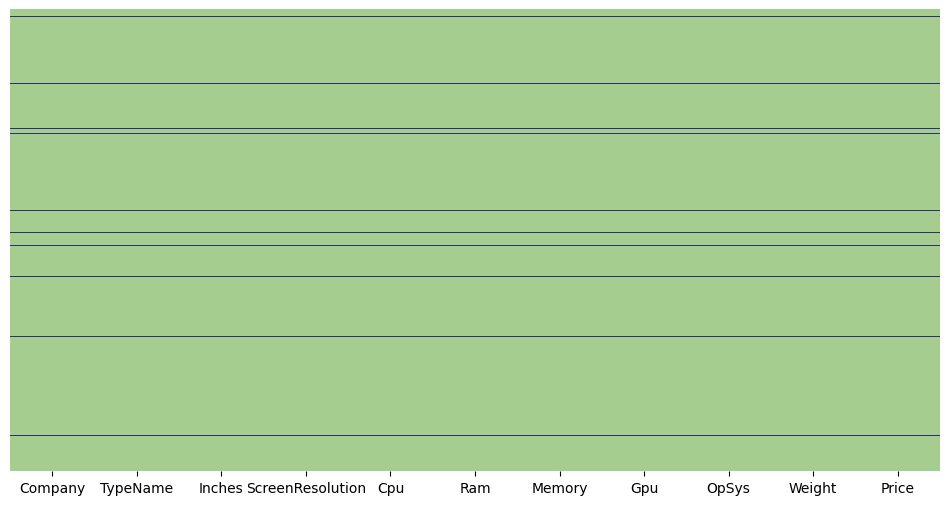

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

sns.heatmap(df.isnull(),cbar=False, cmap='crest',yticklabels=False)

## Απομάκρυνση χαμένων τιμών

In [7]:
df.dropna(inplace=True)
#df.isna().sum() # έλεγχος της αφαίρεσης των χαμένων τιμών

# Αρχικοποίηση δεικτών

In [8]:
df.reset_index(drop=True)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1270,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


# Δημιούργια νέων στηλών (χωρισμός μιας στήλης) [1]
Η στήλη `Cpu` έχει το μοντέλο και την ταχύτητα του επεξεργαστή. Θέλουμε να καταχωρίσουμε το μοντέλο σε μια στήλη με το όνομα `CpuModel` και την ταχύτητα σε μια στήλη `Cpu Speed`.

In [9]:
df[['CpuModel', 'CpuSpeed']] = df['Cpu'].str.rsplit(n=1, expand=True)
df.drop(columns=['Cpu'], inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,2.3GHz
1,Apple,Ultrabook,13.3,1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,1.8GHz
2,HP,Notebook,15.6,Full HD 1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5 7200U,2.5GHz
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Intel Core i7,2.7GHz
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7 6500U,2.5GHz
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7 6500U,2.5GHz
1300,Lenovo,Notebook,14,1366x768,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual Core N3050,1.6GHz
1301,HP,Notebook,15.6,1366x768,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7 6500U,2.5GHz


# Δημιούργια νέων στηλών (χωρισμός μιας στήλης) [2]
Η στήλη `Memory` έχει το μέγεθος και τον τύπο του εσωτερικού δίσκου. Θέλουμε να καταχωρίσουμε το μέγεθος σε μια στήλη με το όνομα `MemorySize` και τον τύπο σε μια στήλη `MemoryType`.

In [10]:
df[['MemorySize', 'MemoryType']] = df['Memory'].str.split(n=1, expand=True)
df.drop(columns=['Memory'], inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed,MemorySize,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,2.3GHz,128GB,SSD
1,Apple,Ultrabook,13.3,1440x900,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,1.8GHz,128GB,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5 7200U,2.5GHz,256GB,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Intel Core i7,2.7GHz,512GB,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,3.1GHz,256GB,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7 6500U,2.5GHz,128GB,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7 6500U,2.5GHz,512GB,SSD
1300,Lenovo,Notebook,14,1366x768,2GB,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage
1301,HP,Notebook,15.6,1366x768,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7 6500U,2.5GHz,1TB,HDD


# Δημιούργια νέων στηλών (χωρισμός μιας στήλης) [3]
Η στήλη `ScreenResolution` έχει την τεχνολογία και την ανάλυση της οθόνης. Θέλουμε να καταχωρίσουμε τη τεχνολογία σε μια στήλη με το όνομα `ScreenType` και την ανάλυση σε μια στήλη `ScreenResolution`.

In [11]:
df['ScreenResolutionPx'] = df['ScreenResolution'].apply(lambda x: str(x).rsplit()[-1])
df['ScreenType'] = df['ScreenResolution'].apply(lambda x: ' '.join(str(x).rsplit()[:-1]) if len(str(x).rsplit()) > 0 else None)
df.drop(columns=['ScreenResolution'], inplace=True)
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed,MemorySize,MemoryType,ScreenResolutionPx,ScreenType
0,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,2.3GHz,128GB,SSD,2560x1600,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,1.8GHz,128GB,Flash Storage,1440x900,
2,HP,Notebook,15.6,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5 7200U,2.5GHz,256GB,SSD,1920x1080,Full HD
3,Apple,Ultrabook,15.4,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Intel Core i7,2.7GHz,512GB,SSD,2880x1800,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,3.1GHz,256GB,SSD,2560x1600,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,4GB,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7 6500U,2.5GHz,128GB,SSD,1920x1080,IPS Panel Full HD / Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,16GB,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7 6500U,2.5GHz,512GB,SSD,3200x1800,IPS Panel Quad HD+ / Touchscreen
1300,Lenovo,Notebook,14,2GB,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage,1366x768,
1301,HP,Notebook,15.6,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7 6500U,2.5GHz,1TB,HDD,1366x768,


# Δημιούργια νέων στηλών (χωρισμός μιας στήλης) [4]

Η στήλη `ScreenType` έχει τις τεχνολογίες της οθόνης, θέλουμε να καταχωρίσουμε τα στοιχεία `IPS Panel` και `Touchscreen` σε δύο ξεχωριστές στήλες για να μπορούμε να έχουμε μια καλύτερη ομαδοποίηση των δεδομένων.

*Εργασία για τη στήλη `IPS Panel`*

In [12]:
df['ScreenPanel'] = df['ScreenType'].apply(lambda x: 'IPS Panel' if 'IPS Panel' in x else '')
#df['ScreenType'] = df['ScreenType'].apply(lambda x: x.replace('IPS Panel','')) # αν θέλουμε να αφαιρέσουμε την περιγραφή από την αρχική στήλη
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed,MemorySize,MemoryType,ScreenResolutionPx,ScreenType,ScreenPanel
0,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,2.3GHz,128GB,SSD,2560x1600,IPS Panel Retina Display,IPS Panel
1,Apple,Ultrabook,13.3,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,1.8GHz,128GB,Flash Storage,1440x900,,
2,HP,Notebook,15.6,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5 7200U,2.5GHz,256GB,SSD,1920x1080,Full HD,
3,Apple,Ultrabook,15.4,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Intel Core i7,2.7GHz,512GB,SSD,2880x1800,IPS Panel Retina Display,IPS Panel
4,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,3.1GHz,256GB,SSD,2560x1600,IPS Panel Retina Display,IPS Panel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,4GB,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7 6500U,2.5GHz,128GB,SSD,1920x1080,IPS Panel Full HD / Touchscreen,IPS Panel
1299,Lenovo,2 in 1 Convertible,13.3,16GB,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7 6500U,2.5GHz,512GB,SSD,3200x1800,IPS Panel Quad HD+ / Touchscreen,IPS Panel
1300,Lenovo,Notebook,14,2GB,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage,1366x768,,
1301,HP,Notebook,15.6,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7 6500U,2.5GHz,1TB,HDD,1366x768,,


*Εργασία για τη στήλη `Touchscreen`*

In [13]:
df['Touchscreen'] = df['ScreenType'].apply(lambda x: 'Touchscreen' if 'Touchscreen' in x else '')
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed,MemorySize,MemoryType,ScreenResolutionPx,ScreenType,ScreenPanel,Touchscreen
0,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,2.3GHz,128GB,SSD,2560x1600,IPS Panel Retina Display,IPS Panel,
1,Apple,Ultrabook,13.3,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,1.8GHz,128GB,Flash Storage,1440x900,,,
2,HP,Notebook,15.6,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5 7200U,2.5GHz,256GB,SSD,1920x1080,Full HD,,
3,Apple,Ultrabook,15.4,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Intel Core i7,2.7GHz,512GB,SSD,2880x1800,IPS Panel Retina Display,IPS Panel,
4,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,3.1GHz,256GB,SSD,2560x1600,IPS Panel Retina Display,IPS Panel,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,4GB,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7 6500U,2.5GHz,128GB,SSD,1920x1080,IPS Panel Full HD / Touchscreen,IPS Panel,Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,16GB,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7 6500U,2.5GHz,512GB,SSD,3200x1800,IPS Panel Quad HD+ / Touchscreen,IPS Panel,Touchscreen
1300,Lenovo,Notebook,14,2GB,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage,1366x768,,,
1301,HP,Notebook,15.6,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7 6500U,2.5GHz,1TB,HDD,1366x768,,,


# Αναδιάταξη των στηλών

In [14]:
df = df[['Company','TypeName','Inches','ScreenResolutionPx','ScreenType','MemorySize','MemoryType','CpuModel','CpuSpeed','Ram','Gpu','OpSys','Price','ScreenPanel','Touchscreen']]
df

,Company,TypeName,Inches,ScreenResolutionPx,ScreenType,MemorySize,MemoryType,CpuModel,CpuSpeed,Ram,Gpu,OpSys,Price,ScreenPanel,Touchscreen
0,Apple,Ultrabook,13.3,2560x1600,IPS Panel Retina Display,128GB,SSD,Intel Core i5,2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,71378.6832,IPS Panel,
1,Apple,Ultrabook,13.3,1440x900,,128GB,Flash Storage,Intel Core i5,1.8GHz,8GB,Intel HD Graphics 6000,macOS,47895.5232,,
2,HP,Notebook,15.6,1920x1080,Full HD,256GB,SSD,Intel Core i5 7200U,2.5GHz,8GB,Intel HD Graphics 620,No OS,30636.0000,,
3,Apple,Ultrabook,15.4,2880x1800,IPS Panel Retina Display,512GB,SSD,Intel Core i7,2.7GHz,16GB,AMD Radeon Pro 455,macOS,135195.3360,IPS Panel,
4,Apple,Ultrabook,13.3,2560x1600,IPS Panel Retina Display,256GB,SSD,Intel Core i5,3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,96095.8080,IPS Panel,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,1920x1080,IPS Panel Full HD / Touchscreen,128GB,SSD,Intel Core i7 6500U,2.5GHz,4GB,Intel HD Graphics 520,Windows 10,33992.6400,IPS Panel,Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,IPS Panel Quad HD+ / Touchscreen,512GB,SSD,Intel Core i7 6500U,2.5GHz,16GB,Intel HD Graphics 520,Windows 10,79866.7200,IPS Panel,Touchscreen
1300,Lenovo,Notebook,14,1366x768,,64GB,Flash Storage,Intel Celeron Dual Core N3050,1.6GHz,2GB,Intel HD Graphics,Windows 10,12201.1200,,
1301,HP,Notebook,15.6,1366x768,,1TB,HDD,Intel Core i7 6500U,2.5GHz,6GB,AMD Radeon R5 M330,Windows 10,40705.9200,,


# Ομαδοποίηση κατά κατασκευαστή
Ομαδοποίηση και ταξινόμηση των πωλήσεων κατά κατασκευαστή με βάση τη μέση τιμή πώλησης των προϊόντων

In [15]:
df1 = df.groupby('Company')['Price'].mean().reset_index()
df1.sort_values('Price', ascending=False, inplace=True)
df1.columns = ['Company','MeanPrice']
df1.reset_index(drop=True, inplace=True)
df1

,Company,MeanPrice
0,Razer,178282.491429
1,LG,111834.720000
2,MSI,91814.548891
3,Google,89386.080000
4,Microsoft,85903.788000
5,Apple,83340.499886
6,Huawei,75870.720000
7,Samsung,75308.320000
8,Toshiba,66747.370213
9,Dell,63237.061079


### Ομαδοποίηση των πωλήσεων κατά κατασκευαστή και υπολογισμός της μέσης, μέγιστης και ελάχιστης τιμής

In [16]:
agg_functions = {'Price': ['mean', 'max', 'min']}
df2 = df.groupby('Company').agg(agg_functions).reset_index()
df2['Price'] = df2['Price'].round(2)
df2

Company      Price                      
                    mean        max        min
0        Acer   33394.62  138474.72    9270.72
1       Apple   83340.50  152274.24   47895.52
2        Asus   58972.37  211788.00   10602.72
3       Chuwi   16745.73   23922.72   13053.07
4        Dell   63237.06  194972.83   14646.67
5     Fujitsu   38574.72   42570.72   34578.72
6      Google   89386.08  117162.72   67932.00
7          HP   57214.37  233845.92   11135.52
8      Huawei   75870.72   79866.72   71874.72
9          LG  111834.72  122490.72  101178.72
10     Lenovo   58072.48  261018.72   12201.12
11        MSI   91814.55  149130.72   44701.92
12   Mediacom   15717.60   20725.92   12733.92
13  Microsoft   85903.79  137941.92   52693.92
14      Razer  178282.49  324954.72   54825.12
15    Samsung   75308.32   98514.72   14332.32
16    Toshiba   66747.37  149130.72   23816.16
17       Vero   11584.40   13852.80   10442.88
18     Xiaomi   60390.88   74589.34   49816.80

## Σημείωση
Ένα σημαντικό στοιχείο είναι ότι για καλύτερη μελέτη των δεδομένων θα πρέπει να γίνει η σύγκριση των πωλήσεων των κατασκευαστών ανά τύπο υπολογιστή. Αυτό μπορεί να γίνει με την κατασκευή ενός `pivot table` όπου στις γραμμές θα είναι οι κατασκευαστές, στις στήλες οι τύποι υπολογιστή και στα κελία οι μέσοι όροι των τιμών πώλησης.

In [17]:
pivot_mean_df = df.pivot_table(index='Company', columns='TypeName', values='Price', aggfunc='mean')
pivot_mean_df = pivot_mean_df.round(2)
pivot_mean_df.fillna('', inplace=True)
pivot_mean_df

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,37229.47,78221.7,16303.68,28778.65,47445.84,
Apple,,,,,83340.5,
Asus,52021.81,91762.53,15502.7,33412.02,68743.99,
Chuwi,,,,16745.73,,
Dell,60465.4,102211.98,27678.96,45889.0,79046.97,118237.33
Fujitsu,,,,38574.72,,
Google,,,,,89386.08,
HP,80601.98,75875.16,53635.2,43791.79,82966.46,122527.06
Huawei,,,,,75870.72,


Ένας πιο ωραίος τρόπος παρουσίασης είναι η κατασκευή ενός `heatmap`.

<Figure size 1500x800 with 0 Axes>

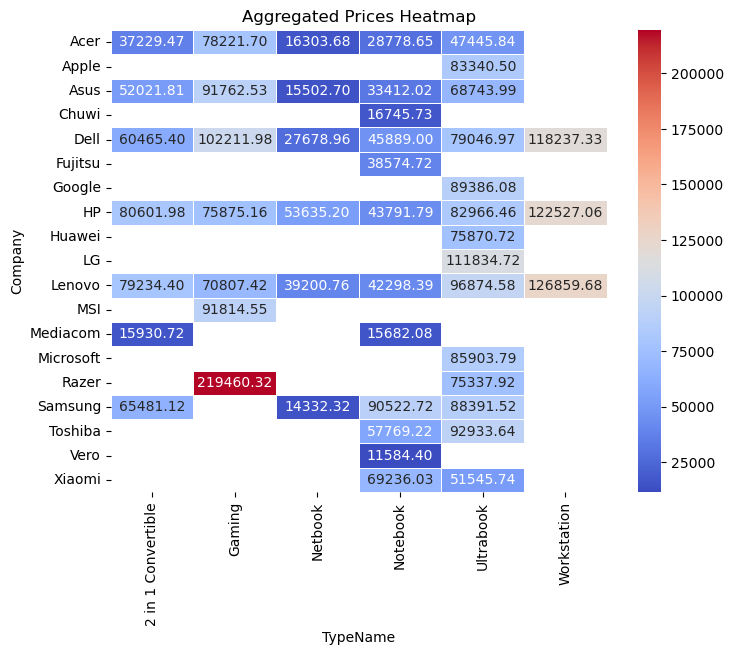

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.groupby(['Company', 'TypeName'])['Price'].mean().reset_index()
df2['Price'] = df2['Price'].round(2)

# Increase the figure size
plt.figure(figsize=(15, 8))

# Reshape the DataFrame for a heatmap
heatmap_data = df2.pivot(index='Company', columns='TypeName', values='Price')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Aggregated Prices Heatmap')

# Save the plot to a file (in PNG format, adjust the filename as needed)
#plt.savefig('heatmap.png')

plt.show()

In [19]:
## module ProfileReport
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Profiling Report")